<a href="https://colab.research.google.com/github/marcosilvaa/data_projects/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando a Violência no Rio de Janeiro**

Notícias relacionadas à criminalidade e violência tem cada vez mais destaque em boa parte das cidades brasileiras.

Com leis que consciêntizam e favorecem o acesso à informação, diversos dados públicos estão sendo disponibilizados para a população em diversas fontes. 

Também conhecida como "Cidade Maravilhosa", o Rio de Janeiro sofre com altos índicies de criminalidade e violência, portanto neste projeto, iremos analisar os dados registrados desde 1991.


# Obtenção dos dados

Os dados para esta análise foram obtidos através do site oficial do  [Governo do Estado do Rio de Janeiro](http://www.ispdados.rj.gov.br/estatistica.html). As estatísticas divulgadas no portal são geradas a partir de Registro de Ocorrência (RO), lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.




## Importando os dados

In [19]:
# importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set()


In [20]:
# importando dados
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

## Análise inicial

Para dar início à nossa análise, vamos dar uma breve verificada no *dataset* e conferir qual o seu tamanho, os nomes das colunas, o tipo de dado a ser encontrado em cada uma delas, conferir as primeiras entradas, e também ver a situação dos dados ausentes.

In [21]:
# verificando o tamanho do dataset
print('Variáveis: ', df.shape[1])
print('Entradas: ', df.shape[0])

Variáveis:  56
Entradas:  344


In [22]:
# verificando as colunas
print(df.columns)

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Conhecendo os nomes das colunas, agora vamos conferir o tipo dos dados associados à cada uma delas.

In [23]:
# verificando o tipo dos dados 
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Como podemos observar, os dados estão de certa forma 'padronizados', sendo que todos encontram-se no formato numérico, seja ele `int` ou `float`.

Após observar isso tudo, agora vamos conferir as primeiras entradas deste *dataset* e analisar como ele está organizado, para então prosseguir para a sua limpeza.


In [24]:
# conferindo as 10 primeiras entradas
df.head(10)


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3
5,1991,6,647,NaN,14,NaN,201,2977,NaN,NaN,NaN,518,178,1354,82,831,342,37,NaN,NaN,NaN,NaN,NaN,81,3423,1992,673,NaN,NaN,NaN,3519,6184,NaN,NaN,NaN,NaN,157,NaN,NaN,NaN,802,NaN,NaN,NaN,NaN,NaN,NaN,111,NaN,NaN,NaN,661,1173,1354,NaN,3
6,1991,7,558,NaN,14,NaN,201,2784,NaN,NaN,NaN,496,186,1365,82,797,308,25,NaN,NaN,NaN,NaN,NaN,94,3353,1978,700,NaN,NaN,NaN,3604,6282,NaN,NaN,NaN,NaN,203,NaN,NaN,NaN,870,NaN,NaN,NaN,NaN,NaN,NaN,126,NaN,NaN,NaN,572,1105,1365,NaN,3
7,1991,8,557,NaN,11,NaN,209,3134,NaN,NaN,NaN,498,189,1347,71,813,299,29,NaN,NaN,NaN,NaN,NaN,88,3334,1835,794,NaN,NaN,NaN,3641,6270,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,809,NaN,NaN,NaN,NaN,NaN,NaN,79,NaN,NaN,NaN,568,1112,1347,NaN,3
8,1991,9,542,NaN,19,NaN,146,3026,NaN,NaN,NaN,473,199,1353,91,805,281,12,NaN,NaN,NaN,NaN,NaN,90,3304,1993,810,NaN,NaN,NaN,3460,6263,NaN,NaN,NaN,NaN,179,NaN,NaN,NaN,756,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,NaN,NaN,561,1086,1353,NaN,3
9,1991,10,613,NaN,21,NaN,200,3482,NaN,NaN,NaN,561,228,1470,83,834,328,16,NaN,NaN,NaN,NaN,NaN,107,3627,1999,862,NaN,NaN,NaN,3621,6482,NaN,NaN,NaN,NaN,184,NaN,NaN,NaN,818,NaN,NaN,NaN,NaN,NaN,NaN,95,NaN,NaN,NaN,634,1162,1470,NaN,3


Como podemos ver logo de início, há uma série de colunas apresentando dados ausentes. Levando em consideração de que este *dataset* apresenta dados registrados desde o ano de 1991, é compreensível que parte destes dados tenham sido perdidos ao longo dos anos, há também a hipótese de que dados relacionados à certos tipos de crimes se quer foram computados.

Vamos então conferir a quantidade de dados ausentes presentes em cada uma das colunas, para então prosseguirmos com a limpeza. 

In [25]:
# conferindo o percentual de dados ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Das 56 variáveis presentes, 30 delas apresentam alguma quantidade de valores ausentes, sendo que 9 delas não apresentam mais de 50% dos dados. As variáveis que apresentam essa grande quantidade de dados ausentes, são em grande maioria relacionadas à furto de bicicletas e tráfico de drogas.



# Dados a serem analisados

Como vimos acima, parte considerável dos dados estão ausentes o que dificulta para fazermos uma análise minuciosa, sendo assim vamos focar apenas nos dados que apresentam 100% dos registros.

Agora vamos listar quais variáveis que são interessantes de serem analisadas, e se enquadram nesta categoria :

* Veículares
  * `roubo_veiculo`
  * `furto_veiculos`
  * `recuperacao_veiculos`

* Homícidios
  * `hom_doloso` - Homicídio Doloso
  * `tentat_hom` - Tentativa de Homicídio
  * `latrocinio`

* Roubos
  * `roubo_em_coletivo`
  * `roubo_carga`
  * `roubo_banco`





## Informações estatísticas

Vamos agora verificar o resumo estatístico deste *dataset* e ver quais informações podemos extrair dele.



In [26]:
# obtendo descrição estatística
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

## Roubo de Veículos

Neste *dataset* há diversos tipos de crimes listados, diversos tipos de roubos, crimes relacionados à drogas, diferentes homicídios, desaparecidos, entre outros.

Considerando que os valores ausentes são consideráveis, decidi então analisar uma classificação que apresenta todos os valores presentes, e informações relevantes para nos trazer alguma informação.

Escolhi então analisar os crimes relacionados à roubos de veículos, uma vez que o *dataset* apresenta informaçoes como `roubo_veiculo`, `furto_veiculos`, `recuperacao_veiculos`.

Vamos agora conferir a média para cada uma destas colunas.


In [27]:
# verificando media de roubo_veiculo
mean_roubo_veic = df.roubo_veiculo.mean()
print('A média de veículos roubados é de {:.2f} veículos.'.format(mean_roubo_veic))

A média de veículos roubados é de 2448.70 veículos.


In [28]:
# verificando a media de furto_veiculos
mean_furto_veic = df.furto_veiculos.mean()
print('A média de veículos furtados é de {:.2f} veículos.'.format(mean_furto_veic))

A média de veículos furtados é de 1674.67 veículos.


In [29]:
# verificando a media de recuperacao_veiculos
mean_recup_veic = df.recuperacao_veiculos.mean()
print('A média de veículos recuperados é de {:.2f} veículos'.format(mean_recup_veic))

A média de veículos recuperados é de 1772.24 veículos


Tendo em mente quais o valores médios de roubos e furtos, assim como de veículos recuperados, vamos agora calcular o percentual de veículos recuperados através da seguinte fórmula:
* $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$

In [38]:
# Ver o total de veículos roubados/furtados
total = mean_roubo_veic + mean_furto_veic
print("A média de veículos roubados e furtados é de {:.1f} veículos".format(total))

# ver a média de recuperacao de veículos
print("A média de veículos recuperados é de {:.1f} veículos".format(mean_recup_veic))

# calcular o percentual de recuperacao dos veiculos
total_recup = (mean_recup_veic/total)*100
print("A porcentagem média de veículos recuperados é de {:.2f}%".format(total_recup))


A média de veículos roubados e furtados é de 4123.4 veículos
A média de veículos recuperados é de 1772.2 veículos
A porcentagem média de veículos recuperados é de 42.98%


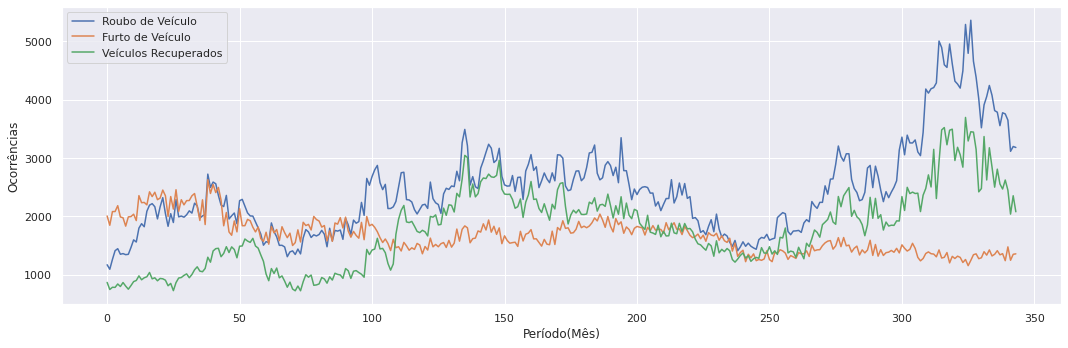

In [43]:
# plotando gráficos para veículos furtados e roubados
fig, ax=plt.subplots(figsize=(15,5))

ax.plot('roubo_veiculo', data=df, label='Roubo de Veículo')
ax.plot('furto_veiculos', data=df, label='Furto de Veículo')
ax.plot('recuperacao_veiculos', data=df, label='Veículos Recuperados')
ax.legend()
ax.set_ylabel('Ocorrências')
ax.set_xlabel('Período(Mês)')

plt.tight_layout()

De acordo com o [IBGE](https://cidades.ibge.gov.br/brasil/rj/rio-de-janeiro/pesquisa/22/28120), atualmente a frota de carros do Rio de Janeiro é de 2.035.943 veículos. Em média, mensalmente pouco mais de 4 mil veículos são roubados ou furtados, e a taxa de recuperação é de aproximadamente 43%.


# Homicídios

O Brasil é um dos países que apresentam as maiores taxas de homicídios no mundo, portanto agora vamos analisar como os índices de homicídio doloso, tentativa de homicídio e latrocínio se comportam.

Primeiro vamos verificar os valores máximos e mínimos para `hom_doloso`, assim como a média geral.


In [31]:
# valores para hom_doloso
max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()
mean_hom_doloso = df.hom_doloso.mean()

# verificando total de homicidio doloso
total_hom_doloso = df.hom_doloso.sum()

# imprimindo valores
print('O valor máximo de homicídio doloso é de {} casos'.format(max_hom_doloso))
print('O valor mínimo de homicídio doloso é de {} casos'.format(min_hom_doloso))
print('A média de registros de casos de homicídio doloso é de {:.0f} casos'.format(mean_hom_doloso))
print('O total de casos registrados para homicídio doloso é de {} casos'.format(total_hom_doloso))

O valor máximo de homicídio doloso é de 831 casos
O valor mínimo de homicídio doloso é de 272 casos
A média de registros de casos de homicídio doloso é de 505 casos
O total de casos registrados para homicídio doloso é de 173567 casos


Em aproximadamente 30 anos de registros do *dataset*, foi computado um total de 173.567 casos de homicídio doloso retoranando uma média de 505 casos, o maior valor registrado foi de 831 casos, contra 272 do menor registro.

Agora vamos analisar as datas de ocorrência de cada um destes valores.

In [32]:
# verificando a data de maior registro
df[df.hom_doloso == 831]


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


In [33]:
# verificando data de menor registro
df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [34]:
# obtendo porcentagem relativa ao total de casos 
porcentagem_max_hom_doloso = (max_hom_doloso / total_hom_doloso)*100
porcentagem_min_hom_doloso = (min_hom_doloso / total_hom_doloso)*100
print('O valor máximo de homicídio doloso representa {:.2f}% de todos os casos registrados'.format(porcentagem_max_hom_doloso))
print('O valor mínimo de homicídio doloso representa {:.2f}% de todos os casos registrados'.format(porcentagem_min_hom_doloso))

O valor máximo de homicídio doloso representa 0.48% de todos os casos registrados
O valor mínimo de homicídio doloso representa 0.16% de todos os casos registrados


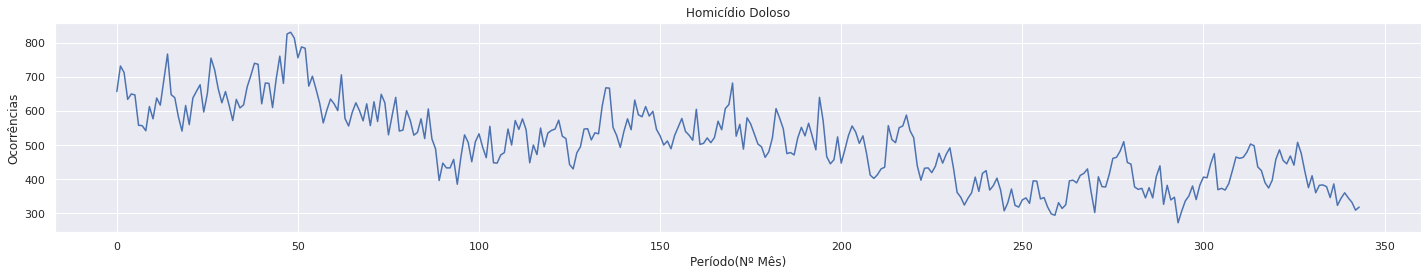

In [58]:
#plotando gráfico para hom_doloso
fig, ax= plt.subplots(figsize=(20,4))

ax.plot('hom_doloso', data=df)
ax.set_xlabel("Período(Nº Mês)")
ax.set_ylabel('Ocorrências')
ax.set_title("Homicídio Doloso")

plt.tight_layout()

Janeiro de 1995 foi a data em que o Rio de Janeiro teve seu ápice mensal de casos, o que correspondeu a aproximadamente 0,5% de todos os 173.567 casos registrados, em um único mes. 

Após 20 anos, em Junho de 2015 a cidade do Rio de Janeiro registrou aproximadamente 25% do valor máximo já registrado. Vamos aprofundar a nossa análise e verificar se esse valor está relacionado à uma real baixa no índice de criminalidade.

##Histograma para Homicídios

Através de histogramas, é possível compreender a distribuição dos valores de cada variável.
Agora vamos analisar o Histograma para `hom_doloso`, `latrocínio` e `tentat_hom` e comparar os resultados


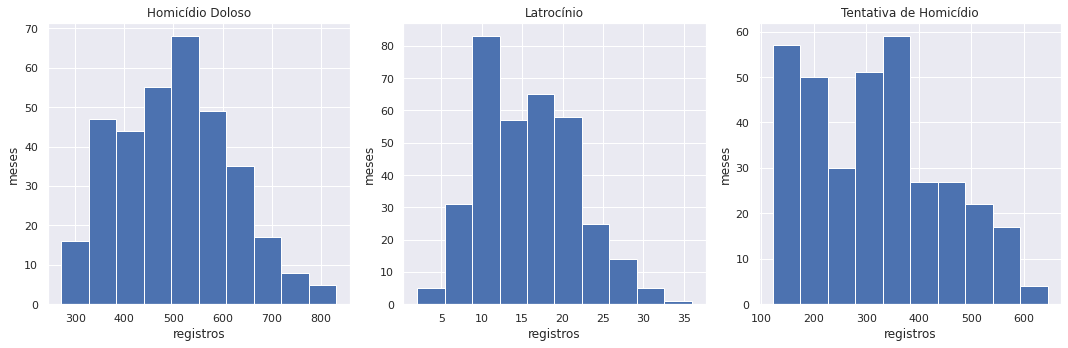

In [35]:
# plotando histogramas
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

ax[0].hist(df.hom_doloso)
ax[0].set_title("Homicídio Doloso")
ax[0].set_xlabel('registros')
ax[0].set_ylabel('meses')

ax[1].hist(df.latrocinio)
ax[1].set_title("Latrocínio")
ax[1].set_xlabel('registros')
ax[1].set_ylabel('meses')

ax[2].hist(df.tentat_hom)
ax[2].set_title("Tentativa de Homicídio")
ax[2].set_xlabel('registros')
ax[2].set_ylabel('meses')

plt.tight_layout()


Em relação às mortes, os histogramas nos informam que:

* Quase 70 meses registraram uma média de 500 a 550 casos de Homicídio Doloso.
* Menos de 10 meses registraram 800 casos de Homicídio Doloso.
* Mais de 80 meses registraram 10 casos de Latrocínio.
* Menos de 10 meses registraram 30 casos ou mais.

Agora para os crimes relacionados à tentativa de homicídio:

* Quase 60 meses obtiveram em torno de 350 registros.
* Menos de 20 meses registraram 550 casos ou mais.

# Evolução dos Roubos

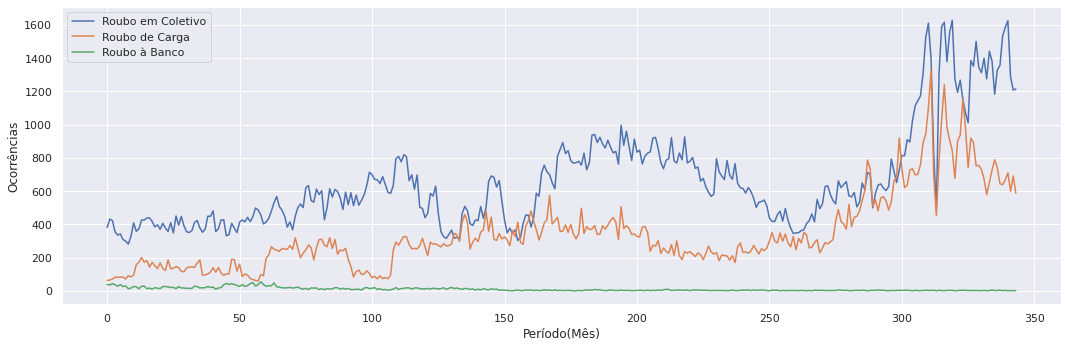

In [36]:
# plotando gráficos para dados de roubos
fig, ax=plt.subplots(figsize=(15,5))

ax.plot('roubo_em_coletivo', data=df, label='Roubo em Coletivo')
ax.plot('roubo_carga', data=df, label='Roubo de Carga')
ax.plot('roubo_banco', data=df, label='Roubo à Banco')
ax.legend()
ax.set_ylabel('Ocorrências')
ax.set_xlabel('Período(Mês)')

plt.tight_layout()

Através deste gráfico podemos conferir que os Roubos à Banco que comecam com uma certa quantidade de registros, ao longo do tempo tendem cada vez mais a zero. 

Lembrando que cada período no eixo X equivale a um mês de registro, se analisarmos a partir do ponto 250, que equivale a pouco mais de 8 anos atrás, nota-se um crescimento nos índices de roubo de carga e roubo em coletivo, saindo de uma média de 400 casos chegando a 1600 em um período de aproximadamente 5 anos. Então nota-se uma queda nos registros de roubo de cargas, mas infelizmente o mesmo não ocorre para o roubo em coletivo.

# CONCLUSÃO



O Rio de Janeiro além de ser uma cidade maravilhosa, infelizmente também pode ser uma cidade perigosa, como observamos em alguns dados, a criminalidade já foi pior no passado, ou seja, sua situação vem melhorando a cada dia que passa.  

Trabalhar com dados reais é de fato um desafio, os imprevistos são grandes, o tratamento dos dados deve ser realizado com total atenção uma vez que, ao considerar ou desconsiderar algo como outlier, ou até 'esquecer' algum valor ausente pode comprometer totalmente a qualidade da analise. 

Não se trata apenas de gerar gráficos de qualidade, mas sim de gerar informação de qualidade.